In [1473]:
#!unzip -q ./playground-series-s5e3.zip

In [1474]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [1475]:
df = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [1476]:
test.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [1477]:
test['winddirection'].fillna(test['winddirection'].mean(), inplace=True)

/var/folders/_y/43jnj0hj0cjgvrt9dxjp68100000gn/T/ipykernel_24043/723861417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['winddirection'].fillna(test['winddirection'].mean(), inplace=True)


In [1478]:
df.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [1479]:
df.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [1480]:
df.drop(columns=['id', 'day'], inplace=True)

test_id = test['id']
test.drop(columns=['id', 'day'], inplace=True)

df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


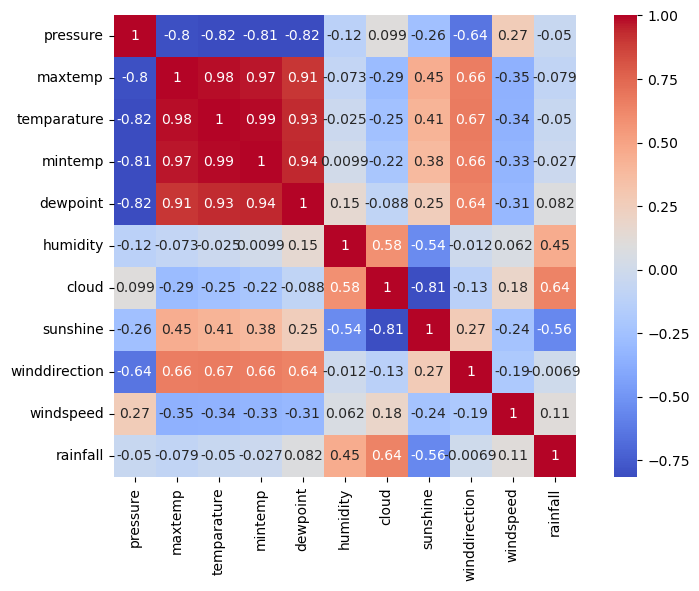

In [1481]:
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.show()

In [1482]:
# df['isSunny'] = np.where(df['sunshine'] > df['cloud'], 1, 0)
# df.drop(columns=['sunshine', 'cloud'], inplace=True)

In [1483]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = df[["sunshine", "cloud"]].columns
vif["VIF"] = [variance_inflation_factor(df[["sunshine", "cloud"]].values, i) for i in range(2)]
vif

,Variable,VIF
0,sunshine,1.479332
1,cloud,1.479332


In [1484]:
q = df["sunshine"] + df["cloud"]
print(q.describe())

count    2190.000000
mean       79.466347
std        15.259175
min        12.200000
25%        75.725000
50%        85.200000
75%        88.600000
max       100.600000
dtype: float64


In [1485]:
# df['temp'] = (df['maxtemp']+df['temparature']+df['mintemp'] + df['dewpoint'])/4
# df['press'] = (df['maxtemp']+df['temparature']+df['mintemp'] + df['dewpoint'])/4
# #df.drop(columns=['maxtemp', 'temparature', 'mintemp', 'dewpoint'], inplace=True)
# df.head()

In [1486]:
# df.drop(columns=['maxtemp', 'temparature', 'mintemp'], inplace=True)

In [1487]:
df['maxtemp_mintemp_avg'] = (df['maxtemp'] + df['mintemp']) / 2
corr = df[['temparature', 'maxtemp_mintemp_avg']].corr().iloc[0,1]
df.drop(columns=['maxtemp_mintemp_avg'], inplace=True)
print(f"Корреляция: {corr:.2f}")

Корреляция: 0.99


In [1488]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif = pd.DataFrame()
    vif["Variable"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

calculate_vif(df[['maxtemp', 'temparature', 'mintemp', 'dewpoint']])

,Variable,VIF
0,maxtemp,689.994007
1,temparature,1769.874674
2,mintemp,901.330432
3,dewpoint,139.178797


Фичи имеют линейную зависимость (мультиколлинеарность)

In [1489]:
# Проверка гипотезы temperature = (maxtemp + mintemp)/2
diff = (df['temparature'] - (df['maxtemp'] + df['mintemp'])/2).abs().sum()
print(f"Суммарная ошибка: {diff}")

Суммарная ошибка: 1169.0999999999997


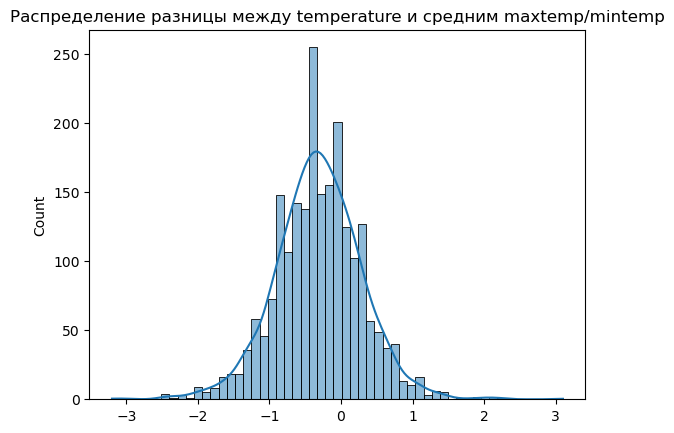

In [1490]:
q = df['temparature'] - (df['maxtemp'] + df['mintemp']) / 2
sns.histplot(q, kde=True)
plt.title("Распределение разницы между temperature и средним maxtemp/mintemp")
plt.show()

#test['temp_diff'] = test['temparature'] - (test['maxtemp'] + test['mintemp']) / 2

In [1491]:
# df['dew_deviation'] = df['dewpoint'] - df['temparature']
# df = df.drop('dewpoint', axis=1)

# test['dew_deviation'] = test['dewpoint'] - test['temparature']
# test = test.drop('dewpoint', axis=1)

In [1492]:
# df['temp_range'] = df['maxtemp'] - df['mintemp']
# test['temp_range'] = test['maxtemp'] - test['mintemp']
# #df = df.drop(['maxtemp', 'mintemp', 'temparature'], axis=1)

In [1493]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calculate_vif(data):
#     vif = pd.DataFrame()
#     vif["Variable"] = data.columns
#     vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
#     return vif

# # Пример для нового набора данных
# calculate_vif(df[['temp_range', 'dew_deviation']])

In [1494]:
def perform_feature_engineering(df):
    # Temperature Difference - Difference between max and min temperature
    #  Temperature Features
    df["temp_range"] = df["maxtemp"] - df["mintemp"]
    df["avg_temp"] = (df["maxtemp"] + df["mintemp"]) / 2

    #  Humidity and Dew Point Interaction
    df["humidity_dew_diff"] = df["humidity"] - df["dewpoint"]

    #  **Cloud-Based Features**
    df["cloud_sun_ratio"] = df["cloud"] / (df["sunshine"] + 1e-6)  # Avoid division by zero
    df["cloud_humidity_interaction"] = df["cloud"] * df["humidity"]  # Cloud-Humidity effect
    df["cloud_temp_interaction"] = df["cloud"] * df["avg_temp"]  # Cloud-Temperature relationship
    df["cloud_wind_interaction"] = df["cloud"] * df["windspeed"]  # Cloud and wind interaction
    df["cloud_pressure_ratio"] = df["cloud"] / (df["pressure"] + 1e-6)
    df["cloud_temp_diff"] = df["cloud"] - df["avg_temp"]


    # Dew Point Spread - Difference between temperature and dew point
    df['Dew_Point_Spread'] = df['temparature'] - df['dewpoint']

    # Humidity Category - Binning humidity into low, medium, and high
    df['Humidity_Category'] = pd.cut(df['humidity'], bins=[0, 50, 80, 100], labels=['Low', 'Medium', 'High'])

    # Wind Speed Intensity - Categorizing wind speeds
    df['Wind_Speed_Intensity'] = pd.cut(df['windspeed'], bins=[0, 10, 25, 60], labels=['Calm', 'Breezy', 'Windy'])

    # Wind Direction Grouping - Binning wind direction into 4 quadrants
    df['Wind_Quadrant'] = pd.cut(df['winddirection'], bins=[0, 90, 180, 270, 360], labels=['NE', 'SE', 'SW', 'NW'], include_lowest=True)

    # Interaction Feature: Pressure & Humidity - Multiply to capture pressure-humidity effects
    df['Pressure_Humidity_Interaction'] = df['pressure'] * df['humidity']

    # Interaction Feature: Wind & Cloud Cover - Wind effect on cloud cover
    df['Wind_Cloud_Interaction'] = df['windspeed'] * df['cloud']

    # Temperature Ratio - Normalized temperature based on max recorded value
    df['Temp_Ratio'] = df['temparature'] / df['maxtemp'].max()

    return df

# Apply feature engineering to both train and test data
df = perform_feature_engineering(df)
test = perform_feature_engineering(test)


In [1495]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,...,cloud_wind_interaction,cloud_pressure_ratio,cloud_temp_diff,Dew_Point_Spread,Humidity_Category,Wind_Speed_Intensity,Wind_Quadrant,Pressure_Humidity_Interaction,Wind_Cloud_Interaction,Temp_Ratio
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,...,1513.6,0.086495,67.45,1.2,High,Breezy,NE,88513.8,1513.6,0.572222
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,...,1992.9,0.089259,75.00,1.5,High,Breezy,NE,96852.5,1992.9,0.469444
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,...,850.7,0.045894,30.00,6.8,Medium,Breezy,NE,76807.5,850.7,0.447222
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,...,3382.0,0.093744,77.50,1.0,High,Windy,NE,96273.0,3382.0,0.494444
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,...,1116.0,0.044040,26.75,8.8,Medium,Breezy,NE,53133.6,1116.0,0.511111


In [1496]:
target = df['rainfall']
df.drop(columns=['rainfall'], inplace=True)

In [1497]:
cat_col = [
    "Humidity_Category",  
    "Wind_Speed_Intensity", 
    "Wind_Quadrant"
]

num_col = list(set(df.columns) - set(cat_col))

In [1498]:
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score
# model = CatBoostClassifier(n_estimators=200, learning_rate=0.1, depth=6, random_state=41, verbose=0, cat_features=cat_col)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("Accuracy Classifier:", accuracy_score(y_test, y_pred))


In [1499]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,...,cloud_wind_interaction,cloud_pressure_ratio,cloud_temp_diff,Dew_Point_Spread,Humidity_Category,Wind_Speed_Intensity,Wind_Quadrant,Pressure_Humidity_Interaction,Wind_Cloud_Interaction,Temp_Ratio
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,...,1513.6,0.086495,67.45,1.2,High,Breezy,NE,88513.8,1513.6,0.572222
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,...,1992.9,0.089259,75.00,1.5,High,Breezy,NE,96852.5,1992.9,0.469444
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,...,850.7,0.045894,30.00,6.8,Medium,Breezy,NE,76807.5,850.7,0.447222
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,...,3382.0,0.093744,77.50,1.0,High,Windy,NE,96273.0,3382.0,0.494444
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,...,1116.0,0.044040,26.75,8.8,Medium,Breezy,NE,53133.6,1116.0,0.511111


In [1500]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cat_cols = encoder.fit_transform(df[cat_col])
encoded_cat_cols_df = pd.DataFrame(encoded_cat_cols, columns=encoder.get_feature_names_out(cat_col), index=df.index)
df = df.drop(columns=cat_col)
df = pd.concat([df, encoded_cat_cols_df], axis=1)

enc_test = encoder.transform(test[cat_col])
enc_test_df = pd.DataFrame(enc_test, columns=encoder.get_feature_names_out(cat_col), index=test.index)
test = test.drop(columns=cat_col)
test = pd.concat([test, enc_test_df], axis=1)
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,...,Pressure_Humidity_Interaction,Wind_Cloud_Interaction,Temp_Ratio,Humidity_Category_Low,Humidity_Category_Medium,Wind_Speed_Intensity_Calm,Wind_Speed_Intensity_Windy,Wind_Quadrant_NW,Wind_Quadrant_SE,Wind_Quadrant_SW
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,...,88513.8,1513.6,0.572222,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,...,96852.5,1992.9,0.469444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,...,76807.5,850.7,0.447222,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,...,96273.0,3382.0,0.494444,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,...,53133.6,1116.0,0.511111,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,...,98416.2,1944.8,0.572222,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,...,92128.4,3106.4,0.480556,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,...,80050.7,2599.1,0.452778,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2188,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,...,94051.6,1674.0,0.422222,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1501]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)
X_train

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,...,Pressure_Humidity_Interaction,Wind_Cloud_Interaction,Temp_Ratio,Humidity_Category_Low,Humidity_Category_Medium,Wind_Speed_Intensity_Calm,Wind_Speed_Intensity_Windy,Wind_Quadrant_NW,Wind_Quadrant_SE,Wind_Quadrant_SW
162,1006.6,31.0,29.3,27.1,25.3,79.0,77.0,4.6,220.0,13.9,...,79521.4,1070.3,0.813889,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1873,1013.7,22.3,20.1,18.8,19.2,91.0,80.0,0.0,40.0,12.4,...,92246.7,992.0,0.558333,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1366,1017.0,29.1,27.5,26.0,20.6,65.0,51.0,8.6,80.0,39.3,...,66105.0,2004.3,0.763889,0.0,1.0,0.0,1.0,0.0,0.0,0.0
554,1005.9,34.0,30.6,28.4,25.8,78.0,73.0,10.7,210.0,12.7,...,78460.2,927.1,0.850000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
964,1005.0,33.0,30.0,28.1,25.0,77.0,43.0,9.4,220.0,29.0,...,77385.0,1247.0,0.833333,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1009.9,32.7,30.1,28.9,26.1,81.0,53.0,5.0,220.0,15.0,...,81801.9,795.0,0.836111,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1095,1017.8,16.9,15.9,14.6,15.0,90.0,100.0,0.0,40.0,24.2,...,91602.0,2420.0,0.441667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1130,1017.0,22.4,20.2,18.5,13.1,76.0,69.0,7.6,40.0,11.3,...,77292.0,779.7,0.561111,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1294,1009.6,34.0,30.0,26.5,24.3,80.0,63.0,6.8,190.0,7.9,...,80768.0,497.7,0.833333,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [1502]:
num_col

['winddirection',
 'mintemp',
 'temp_range',
 'maxtemp',
 'cloud_temp_diff',
 'Dew_Point_Spread',
 'cloud_sun_ratio',
 'humidity',
 'sunshine',
 'cloud_wind_interaction',
 'cloud_temp_interaction',
 'Pressure_Humidity_Interaction',
 'dewpoint',
 'windspeed',
 'cloud',
 'avg_temp',
 'pressure',
 'Wind_Cloud_Interaction',
 'cloud_pressure_ratio',
 'humidity_dew_diff',
 'cloud_humidity_interaction',
 'temparature',
 'Temp_Ratio']

In [1503]:
X_train[num_col]

,winddirection,mintemp,temp_range,maxtemp,cloud_temp_diff,Dew_Point_Spread,cloud_sun_ratio,humidity,sunshine,cloud_wind_interaction,...,windspeed,cloud,avg_temp,pressure,Wind_Cloud_Interaction,cloud_pressure_ratio,humidity_dew_diff,cloud_humidity_interaction,temparature,Temp_Ratio
162,220.0,27.1,3.9,31.0,47.95,4.0,1.673913e+01,79.0,4.6,1070.3,...,13.9,77.0,29.05,1006.6,1070.3,0.076495,53.7,6083.0,29.3,0.813889
1873,40.0,18.8,3.5,22.3,59.45,0.9,8.000000e+07,91.0,0.0,992.0,...,12.4,80.0,20.55,1013.7,992.0,0.078919,71.8,7280.0,20.1,0.558333
1366,80.0,26.0,3.1,29.1,23.45,6.9,5.930232e+00,65.0,8.6,2004.3,...,39.3,51.0,27.55,1017.0,2004.3,0.050147,44.4,3315.0,27.5,0.763889
554,210.0,28.4,5.6,34.0,41.80,4.8,6.822429e+00,78.0,10.7,927.1,...,12.7,73.0,31.20,1005.9,927.1,0.072572,52.2,5694.0,30.6,0.850000
964,220.0,28.1,4.9,33.0,12.45,5.0,4.574468e+00,77.0,9.4,1247.0,...,29.0,43.0,30.55,1005.0,1247.0,0.042786,52.0,3311.0,30.0,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,220.0,28.9,3.8,32.7,22.20,4.0,1.060000e+01,81.0,5.0,795.0,...,15.0,53.0,30.80,1009.9,795.0,0.052480,54.9,4293.0,30.1,0.836111
1095,40.0,14.6,2.3,16.9,84.25,0.9,1.000000e+08,90.0,0.0,2420.0,...,24.2,100.0,15.75,1017.8,2420.0,0.098251,75.0,9000.0,15.9,0.441667
1130,40.0,18.5,3.9,22.4,48.55,7.1,9.078946e+00,76.0,7.6,779.7,...,11.3,69.0,20.45,1017.0,779.7,0.067847,62.9,5244.0,20.2,0.561111
1294,190.0,26.5,7.5,34.0,32.75,5.7,9.264705e+00,80.0,6.8,497.7,...,7.9,63.0,30.25,1009.6,497.7,0.062401,55.7,5040.0,30.0,0.833333


In [1504]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

test[num_col] = scaler.transform(test[num_col])

In [1505]:
X_train.dtypes

pressure                         float64
maxtemp                          float64
temparature                      float64
mintemp                          float64
dewpoint                         float64
humidity                         float64
cloud                            float64
sunshine                         float64
winddirection                    float64
windspeed                        float64
temp_range                       float64
avg_temp                         float64
humidity_dew_diff                float64
cloud_sun_ratio                  float64
cloud_humidity_interaction       float64
cloud_temp_interaction           float64
cloud_wind_interaction           float64
cloud_pressure_ratio             float64
cloud_temp_diff                  float64
Dew_Point_Spread                 float64
Pressure_Humidity_Interaction    float64
Wind_Cloud_Interaction           float64
Temp_Ratio                       float64
Humidity_Category_Low            float64
Humidity_Categor

In [1506]:
X_train.shape

(1752, 30)

In [1507]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
modelXGB = XGBClassifier(n_estimators=200, random_state=42)
modelXGB.fit(X_train, y_train)
y_pred = modelXGB.predict(X_test)
print("Accuracy Classifier:", accuracy_score(y_test, y_pred))

Accuracy Classifier: 0.8493150684931506


In [1508]:
from sklearn.linear_model import LogisticRegression
logistRegerss = LogisticRegression(solver='liblinear',penalty='l1',max_iter=10000, random_state=88,C=1.0)
logistRegerss.fit(X_train, y_train)
y_pred = logistRegerss.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8515981735159818


In [1509]:
X_train.shape

(1752, 30)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch import nn

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(30, 64),
    nn.ReLU(),
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)
scheduler = ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    factor=0.5, #уменьшаем лр в 2 раза
    patience=5, #ждем 5 эпох без результатов
    verbose=True
)
epochs = 100
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        out = model(X_batch).squeeze()
        loss = criterion(out, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    scheduler.step(avg_loss)
    curr_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

    if curr_lr < 1e-6:
        break

with torch.no_grad():
    model.eval()
    out = model(X_test_tensor).squeeze()
    y_pred = (out > 0.5).float()
print("Accuracy:", accuracy_score(y_test_tensor.numpy(), y_pred.numpy()))

/opt/anaconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/200], Loss: 0.3684
Epoch [2/200], Loss: 0.3417
Epoch [3/200], Loss: 0.3279
Epoch [4/200], Loss: 0.3282
Epoch [5/200], Loss: 0.3261
Epoch [6/200], Loss: 0.3170
Epoch [7/200], Loss: 0.3208
Epoch [8/200], Loss: 0.3180
Epoch [9/200], Loss: 0.3169
Epoch [10/200], Loss: 0.3063
Epoch [11/200], Loss: 0.3088
Epoch [12/200], Loss: 0.3146
Epoch [13/200], Loss: 0.3088
Epoch [14/200], Loss: 0.2965
Epoch [15/200], Loss: 0.3011
Epoch [16/200], Loss: 0.3067
Epoch [17/200], Loss: 0.2996
Epoch [18/200], Loss: 0.2953
Epoch [19/200], Loss: 0.2903
Epoch [20/200], Loss: 0.2891
Epoch [21/200], Loss: 0.2865
Epoch [22/200], Loss: 0.2892
Epoch [23/200], Loss: 0.2831
Epoch [24/200], Loss: 0.2865
Epoch [25/200], Loss: 0.2756
Epoch [26/200], Loss: 0.2766
Epoch [27/200], Loss: 0.2661
Epoch [28/200], Loss: 0.2698
Epoch [29/200], Loss: 0.2695
Epoch [30/200], Loss: 0.2754
Epoch [31/200], Loss: 0.2627
Epoch [32/200], Loss: 0.2571
Epoch [33/200], Loss: 0.2559
Epoch [34/200], Loss: 0.2475
Epoch [35/200], Loss: 0

In [1511]:
test = torch.tensor(test.values, dtype=torch.float32)

with torch.no_grad():
    model.eval()
    out = model(test).squeeze()
    n_test_pred = (out > 0.5).float()

In [1512]:
test_pred = logistRegerss.predict(test) 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1513]:
output = pd.DataFrame({"id": test_id, 'prediction': n_test_pred})
output.head()

,id,prediction
0,2190,1.0
1,2191,1.0
2,2192,1.0
3,2193,0.0
4,2194,0.0


In [1514]:
output.to_csv('submission.csv', index=False)